## Homework #2

1) For snake eyes its 1/36

- 3 + 4
- 6 + 1
- 5 + 2

Snake eyes is 1/36

For sum of 7 it is a 1/6 probability

Ratio would be 1:6

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sympy as sp

2) 

For sum = 2

* p(1 and 1) = 1/6 * 1/6 = 1/36

For sum = 3

* p(1 and 2) + p(2 and 1) = 1/36 + 1/36 = 1/18

For sum = 4

* p(2 and 2) + p(3 and 1) + p(1 and 3) = 1/36 + 1/36 + 1/36 = 1/12

For sum = 5

* p(2 and 3) + p(3 and 2) + p(4 and 1) + p(1 and 4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

For sum = 6

* p(3 and 3) + p(4 and 2) + p(2 and 4) + p(5 and 1) + p(1 and 5) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

For sum = 7

* p(3 and 4) + p(4 and 3) + p(5 and 2) + p(2 and 5) + p(1 and 6) + p(6 and 1) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 1/6

For sum = 8

* p(4 and 4) + p(5 and 3) + p(3 and 5) + p(6 and 2) + p(2 and 6) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

For sum = 9

* p(3 and 6) + p(6 and 3) + p(4 and 5) + p(5 and 4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

For sum = 10

* p(5 and 5) + p(6 and 4) + p(4 and 6) = 1/36 + 1/36 + 1/36 = 1/12

For sum = 11

* p(6 and 5) + p(5 and 6) = 1/36 + 1/36 = 1/18

For sum = 12

* p(6 and 6) = 1/6 * 1/6 = 1/36

In [4]:
die=np.array([1/6,1/6,1/6,1/6,1/6,1/6])
c=np.convolve(die,die)
c

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [49]:
x=np.arange(2,13)
for i in range(len(c)):
    print(f"The Probability of Summing to {x[i]} is {sp.nsimplify(c[i])}")

The Probability of Summing to 2 is 1/36
The Probability of Summing to 3 is 1/18
The Probability of Summing to 4 is 1/12
The Probability of Summing to 5 is 1/9
The Probability of Summing to 6 is 5/36
The Probability of Summing to 7 is 1/6
The Probability of Summing to 8 is 5/36
The Probability of Summing to 9 is 1/9
The Probability of Summing to 10 is 1/12
The Probability of Summing to 11 is 1/18
The Probability of Summing to 12 is 1/36


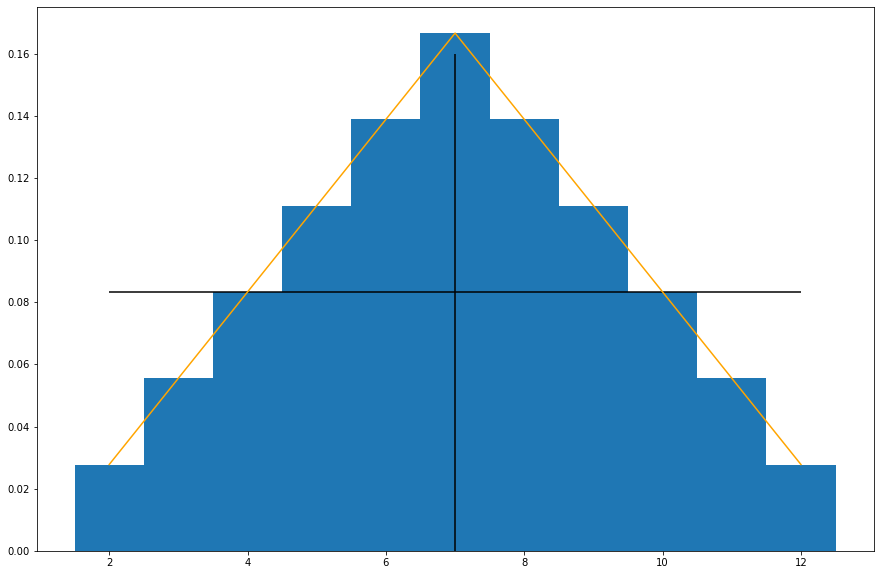

In [63]:
fig, ax = plt.subplots(figsize=(15,10))
x=np.arange(2,13)
ax.bar(x,c,width=1)
ax.hlines((1/6)/2,2,12)
ax.vlines(7,0,0.16)
ax.plot(x,c,c='orange');

In [9]:
m=x*c
m.sum()

6.999999999999998

In [60]:
sq=(x-7)**2
np.sum(sq*c)

5.833333333333334

4)
* Min amount is 10, max amount is 60

In [41]:
con=die
for i in range(9):
    con=np.convolve(con,die)

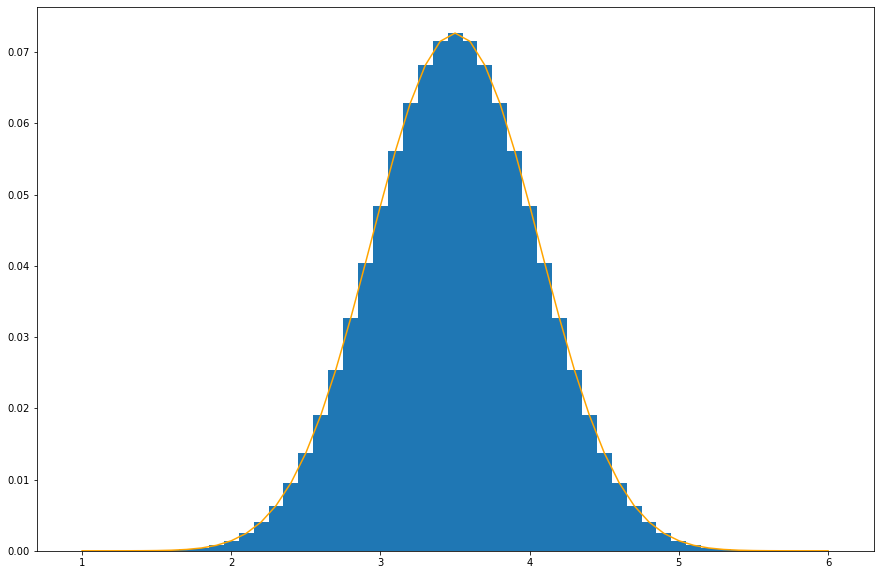

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
xnew=np.arange(1,6.1,step=0.1)
ax.bar(xnew,con,width=0.1)
#plt.yscale('log')
ax.plot(xnew,con,c='orange');

Is this gaussian? Explain

In [56]:
xnew

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ])

In [49]:
sup=(xnew-35)**2
sup.sum()/(6**10 - 1)

0.0001827468001738162